In [2]:
#Verwendete Packages
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.font_manager as fm
from pylab import cm
import pandas as pd
import seaborn as sns
import os

In [3]:
#Berechnung der mittleren Bindungslänge d

def d(Molekül):
    
    i = 0
    result = 0
    
    for a in Molekül:
        
        if a == "C--C":
        
            result += 134
            i += 1
            
        if a == "C-C":
    
            result+= 154
            i += 1
        
        if a == "C-N":
            
            result+= 148
            i+=1
    
        if a == "C--N":
            result += 122
            i += 1
            
        if a == "C--O":
            result += 123
            i += 1
        
    return result / i

In [4]:
def Lambda(d, N, z):
    
    h = 6.262608015 * 10 ** (-34)
    m_e = 9.10938356 * 10 ** (-31)
    c = 2.99792458 * 10 ** 8
    d = d * 10 ** (-12)
    N_A = 6.02214076 * 10 ** (23)
    
    
    delta_E = N_A * (h**2 * (N+1)) /   (8 * m_e * (z+1)**2 * d**2 * 1000) 
    
    Lambdaa = 10 ** 9 * (8 * m_e * c * (z+1)**2 * d**2) / (h * (N+1))
    
    
    return Lambdaa

In [5]:
def delta_E(d, N, z):
    
    h = 6.262608015 * 10 ** (-34)
    m_e = 9.10938356 * 10 ** (-31)
    c = 2.99792458 * 10 ** 8
    d = d * 10 ** (-12)
    N_A = 6.02214076 * 10 ** (23)
    
    
    delta_E = N_A * (h**2 * (N+1)) /   (8 * m_e * (z+1)**2 * d**2 * 1000) 
    
    Lambdaa = (8 * m_e * c * (z+1)**2 * d**2) / (h * (N+1)) * 10 ** 9
    
    return delta_E

In [87]:
#Berechnung theoretischer Werte

# Cyanine: N = z + 1    -> z = N - 1

N = [10, 12, 14, 16]
z = [9, 11, 13, 15]

x_C = []
results_C_lambda = []
results_C_delta_E = []

for i in range(len(N)):
    
    x_C.append(N[i])
    results_C_lambda.append(Lambda(139, N[i], z[i]))
    results_C_delta_E.append(delta_E(139, N[i], z[i]))

#Phenylpolyenal N = z   ; Lambda(d, N, z)

N_P = [6, 10, 16]
z_P = [6, 10, 16]

x_P = [6, 10, 16]
results_P_lambda = []
results_P_delta_E = []

for i in range(len(N_P)):
    
    results_P_lambda.append(Lambda(143, N_P[i], z_P[i]))
    results_P_delta_E.append(delta_E(143, N_P[i], z_P[i]))

In [30]:
#Importierung experimenteller Werte

file_to_open = '/Users/samuelwechsler/Documents/Gymer/Prima/Chemie/Chemieprojekt/Lambda_Max.csv'
data0 = pd.read_csv(file_to_open, sep = ";", header = 0)

data0

,Messung,Lambda_Exp,Molekül
0,1,355,Trienal
1,2,345,Trienal
2,3,402,Pentaenal
3,4,402,Pentaenal
4,5,402,Pentaenal
5,6,417,Heptaenal
6,7,416,Heptaenal
7,8,416,Heptaenal
8,9,710,Cyanin


In [36]:
h = 6.262608015 * 10 ** (-34)
c = 2.99792458 * 10 ** 8
N_A = 6.02214076 * 10 ** (23)

Trienal = [355, 345]
Pentaenal = [402, 402, 402]
Heptaenal = [417, 416, 416]
Cyanin = [710]

Trienal_mean = np.mean(Trienal)
Pentaenal_mean = np.mean(Pentaenal)
Heptaenal_mean = np.mean(Heptaenal)
Cyanin_mean = np.mean(Cyanin)

lambda_Phenylpolyenal_exp = [Trienal_mean, Pentaenal_mean, Heptaenal_mean]
delta_E_Phenylpolyenal_exp = [N_A*h*c*10**(-3)/(i*10**(-9)) for i in lambda_Phenylpolyenal_exp]
lambda_Cyanin_exp = [Cyanin_mean]
delta_E_Cyanin_exp = [N_A*h*c*10**(-3)/(i*10**(-9)) for i in lambda_Cyanin_exp]

V_korr_Phenylpolyenal = [results_P_lambda[i]-lambda_Phenylpolyenal_exp[i] for i in range(3)]
V_korr_Cyanin = [results_C_lambda[1]-Cyanin_mean]


Trienal_std = np.std(Trienal)
Pentaenal_std = np.std(Pentaenal)
Heptaenal_std = np.std(Heptaenal)
Cynanin_std = np.std(Cyanin)

error = [Trienal_std, Pentaenal_std, Heptaenal_std]

In [86]:
error

[5.0, 0.0, 0.4714045207910317]

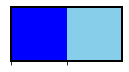

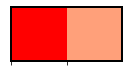

In [38]:
#Farbwahl

custcol_lambda = ["blue", "skyblue"]
custcol_delta_E = ["red", "lightsalmon"]

sns.palplot(sns.color_palette(custcol_lambda))
sns.palplot(sns.color_palette(custcol_delta_E))

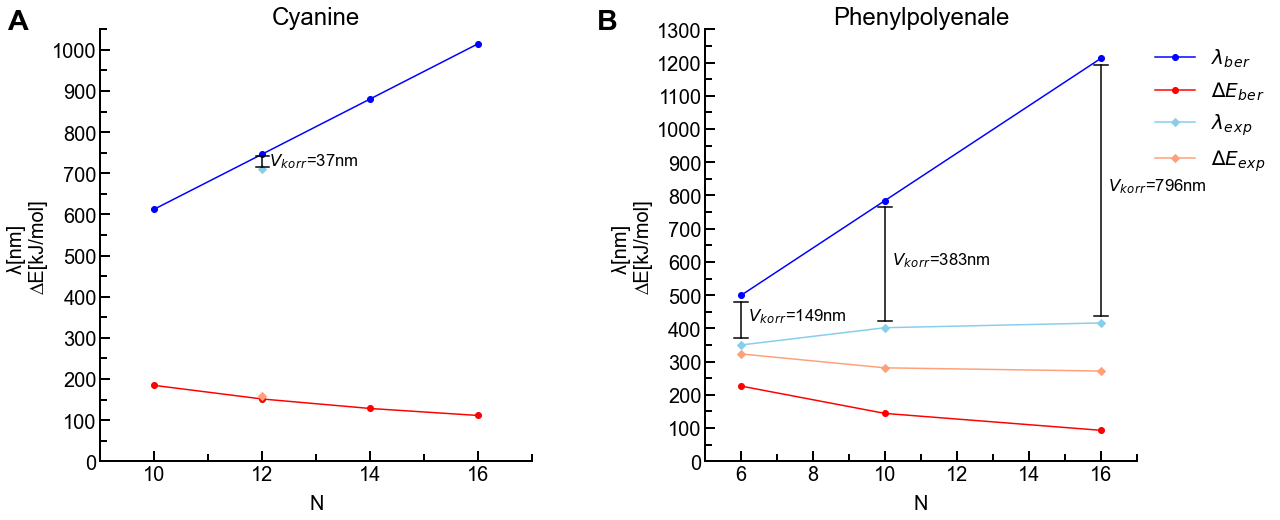

In [85]:
#Visualisierung

fig = plt.figure(figsize=(6, 6))

ax = fig.add_axes([0, 0, 1, 1])
ax1 = fig.add_axes([1.4, 0, 1, 1])

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)

mpl.rcParams['font.family'] = 'Arial'
plt.rcParams['font.size'] = 20
plt.rcParams['axes.linewidth'] = 2
plt.rcParams['axes.titlepad'] = 2.0

#Cyanine

ax.xaxis.set_tick_params(which='major', size=10, width=2, direction='in')
ax.xaxis.set_tick_params(which='minor', size=7, width=2, direction='in')
ax.yaxis.set_tick_params(which='major', size=10, width=2, direction='in')
ax.yaxis.set_tick_params(which='minor', size=7, width=2, direction='in')
ax.xaxis.set_major_locator(mpl.ticker.MultipleLocator(2))
ax.xaxis.set_minor_locator(mpl.ticker.MultipleLocator(1))
ax.yaxis.set_major_locator(mpl.ticker.MultipleLocator(100))
ax.yaxis.set_minor_locator(mpl.ticker.MultipleLocator(50))

ax.set_xlim(9, 17)
ax.set_ylim(0, 1050)

ax.set_xlabel('N', labelpad = 10)
ax.set_ylabel('λ[nm] \n∆E[kJ/mol]')

ax.set_title('Cyanine')

    #Theoretische Werte

ax.plot(x_C, results_C_lambda, color = custcol_lambda[0], marker = "o")
ax.plot(x_C, results_C_delta_E, color = custcol_delta_E[0], marker = "o")

    #Experimentelle werte

ax.plot([12], [Cyanin_mean], color = custcol_lambda[1], marker = "D")
ax.plot([12], [159.24598302265807], color = custcol_delta_E[1], marker = "D")

  #V_korr


d = 35
r = 0.12
ax.plot([12, 12], [lambda_Cyanin_exp[0]+5, results_C_lambda[1]-5], color = 'black') 
ax.plot([12-r, 12+r], [lambda_Cyanin_exp[0]+5, lambda_Cyanin_exp[0]+5], color = 'black')
ax.plot([12-r, 12+r], [results_C_lambda[1]-5, results_C_lambda[1]-5], color = 'black')
ax.text(12+r, (lambda_Cyanin_exp[0]+ results_C_lambda[1])/2-10, '$V_k$$_o$$_r$$_r$='+str(round(V_korr_Cyanin[0]))+'nm', size = "small")



#Phenylpolyenale

ax1.xaxis.set_tick_params(which='major', size=10, width=2, direction='in')
ax1.xaxis.set_tick_params(which='minor', size=7, width=2, direction='in')
ax1.yaxis.set_tick_params(which='major', size=10, width=2, direction='in')
ax1.yaxis.set_tick_params(which='minor', size=7, width=2, direction='in')
ax1.xaxis.set_major_locator(mpl.ticker.MultipleLocator(2))
ax1.xaxis.set_minor_locator(mpl.ticker.MultipleLocator(1))
ax1.yaxis.set_major_locator(mpl.ticker.MultipleLocator(100))
ax1.yaxis.set_minor_locator(mpl.ticker.MultipleLocator(50))

ax1.set_xlim(5, 17)
ax1.set_ylim(0, 1300)

ax1.set_xlabel('N', labelpad = 10)
ax1.set_ylabel('λ[nm] \n∆E[kJ/mol]')

    #Theoretische Werte

ax1.plot(x_P, results_P_lambda, color = 'blue', marker = "o", label = '$λ_b$$_e$$_r$')
ax1.plot(x_P, results_P_delta_E, color = 'red', marker = "o", label = '$∆E_b$$_e$$_r$')

    #Experimentelle Werte

ax1.plot(x_P, lambda_Phenylpolyenal_exp, color = custcol_lambda[1], marker ='D', label = '$λ_e$$_x$$_p$')
ax1.plot(x_P, delta_E_Phenylpolyenal_exp, color = custcol_delta_E[1], marker='D', label = '$∆E_e$$_x$$_p$')


    #V_korr

for i in range(len(x_P)):
    d = 20
    r = 0.2
    ax1.plot([x_P[i], x_P[i]], [lambda_Phenylpolyenal_exp[i]+d, results_P_lambda[i]-d], color = 'black') 
    ax1.plot([x_P[i]-r, x_P[i]+r], [lambda_Phenylpolyenal_exp[i]+d, lambda_Phenylpolyenal_exp[i]+d], color = 'black')
    ax1.plot([x_P[i]-r, x_P[i]+r], [results_P_lambda[i]-d, results_P_lambda[i]-d], color = 'black')
    ax1.text(x_P[i]+r, (lambda_Phenylpolyenal_exp[i]+ results_P_lambda[i])/2, '$V_k$$_o$$_r$$_r$='+str(round(V_korr_Phenylpolyenal[i]))+'nm', size = "small")

ax1.set_title('Phenylpolyenale')
ax1.legend(bbox_to_anchor=(1, 1), loc=2, frameon=False, fontsize=20)

ax.text(7.3, 1050, 'A', fontsize='x-large', fontweight='semibold')
ax1.text(2, 1300, 'B', fontsize='x-large', fontweight='semibold')

plt.savefig('/Users/samuelwechsler/Documents/Gymer/Prima/Chemie/Chemieprojekt/HOMOLUMO_Graph.pdf', transparent=False, bbox_inches='tight')